In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import svm

import joblib
import pickle

In [17]:
df = pd.read_csv("cleaned.csv")
df.head()

,Age,Sex,Marital Status,Poverty Level,Prison History,Completed Secondary Education,History of Tobacco Use,Alcohol Use at Least Once Per Week,History of Drug Use,History of Rehab,MDR-TB,Body Mass Index,History of Chronic Disease,HIV Status,History Diabetes Melitus,Treatment Outcome
0,38 and older,Male,Single,Not in poverty,No,Yes,Used to smoke,Yes,No,No,No,Underweight,No,Negative,No,Cured
1,38 and older,Male,Married/cohabitating,Not in poverty,No,Yes,Never smoked,No,No,No,No,Normal,No,Negative,No,Cured
2,27 to 37,Male,Married/cohabitating,Not in poverty,No,No,Never smoked,Yes,Yes,Yes,No,Underweight,No,Negative,No,Cured
3,27 to 37,Male,Married/cohabitating,Poverty/extreme poverty,No,No,Never smoked,Yes,No,No,No,Normal,No,Negative,No,Cured
4,27 to 37,Male,Married/cohabitating,Not in poverty,No,Yes,Used to smoke,Yes,Yes,No,No,Normal,No,Negative,No,Cured


In [12]:
df.isnull().sum()

Unnamed: 0                            0
Age                                   0
Sex                                   0
Marital Status                        0
Poverty Level                         0
Prison History                        0
Completed Secondary Education         0
History of Tobacco Use                0
Alcohol Use at Least Once Per Week    0
History of Drug Use                   0
History of Rehab                      0
MDR-TB                                0
Body Mass Index                       0
History of Chronic Disease            0
HIV Status                            0
History Diabetes Melitus              0
Treatment Outcome                     0
dtype: int64

In [18]:
column = list(df.columns)
column 

['Age',
 'Sex',
 'Marital Status',
 'Poverty Level',
 'Prison History',
 'Completed Secondary Education',
 'History of Tobacco Use',
 'Alcohol Use at Least Once Per Week',
 'History of Drug Use',
 'History of Rehab',
 'MDR-TB',
 'Body Mass Index',
 'History of Chronic Disease',
 'HIV Status',
 'History Diabetes Melitus',
 'Treatment Outcome']

In [20]:
X = df[[ 'Age',
 'Sex',
 'Marital Status',
 'Poverty Level',
 'Prison History',
 'Completed Secondary Education',
 'History of Tobacco Use',
 'Alcohol Use at Least Once Per Week',
 'History of Drug Use',
 'History of Rehab',
 'Body Mass Index',
 'History of Chronic Disease',
 'HIV Status',
 'History Diabetes Melitus',
 'Treatment Outcome']]
y = df['MDR-TB']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
y_train = y_train.replace({'Yes':1, 'No':0})

In [25]:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 271 to 860
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 1547 non-null   object
 1   Sex                                 1547 non-null   object
 2   Marital Status                      1547 non-null   object
 3   Poverty Level                       1547 non-null   object
 4   Prison History                      1547 non-null   object
 5   Completed Secondary Education       1547 non-null   object
 6   History of Tobacco Use              1547 non-null   object
 7   Alcohol Use at Least Once Per Week  1547 non-null   object
 8   History of Drug Use                 1547 non-null   object
 9   History of Rehab                    1547 non-null   object
 10  Body Mass Index                     1547 non-null   object
 11  History of Chronic Disease          1547 non-null   obj

In [26]:

categorical_features = [ 'Age',
 'Sex',
 'Marital Status',
 'Poverty Level',
 'Prison History',
 'Completed Secondary Education',
 'History of Tobacco Use',
 'Alcohol Use at Least Once Per Week',
 'History of Drug Use',
 'History of Rehab',
 'Body Mass Index',
 'History of Chronic Disease',
 'HIV Status',
 'History Diabetes Melitus',
 'Treatment Outcome']
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

preprocessor = ColumnTransformer(transformers=[
                                               ('cat', categorical_transformer, categorical_features)])

In [27]:

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=100))])

In [28]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Age', 'Sex',
                                                   'Marital Status',
                                                   'Poverty Level',
                                                   'Prison History',
                                                   'Completed Secondary '
                                                   'Education',
                                                   'History of Tobacco Use',
                                                   'Alcohol Use at Least Once '
                                                   'Per Week',
                                                   'History of Drug Use',
                                                  

In [31]:
pickle.dump(clf, open('model.pkl', 'wb'))

In [32]:
model = pickle.load(open('model.pkl', 'rb'))

In [33]:
prediction = model.predict(X_test)

In [38]:
y_test = y_test.replace({'Yes':1, 'No':0})

In [39]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[282   2]
 [ 20 212]]


In [41]:
## Model evaluation
#Accuracy score
score =model.score(X_test,y_test)
print(score)
# get predictions on test data


0.9573643410852714


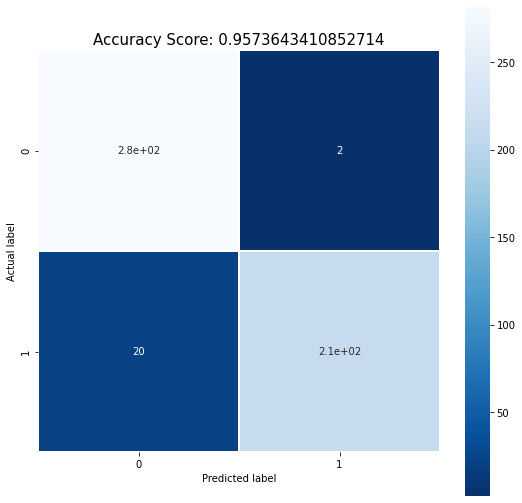

In [42]:
## confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);